## Sprint 6 Project: Analysis of taxis in Chicago

#### introduction:
Zuber is a new ride-sharing company launching in Chicago. To prepare for the launch and better inform my marketing analytics team, I will be analyzing current ride-sharing/taxi companies in Chicago using datasets on current taxi companies, popular Chicago neighborhoods where taxi services are used, and how external factors such as weather affect taxi use.

After preprocessing some data using SQL to create the test_data, I will upload three datasets:

1: 'company' includes current taxi companies and their respective number of trips.

2: 'location' contains the name of the neighborhood in which clients were dropped off and the average trips taken to each respective neighborhood.

3: 'test_data' (titled test_data because I will be performing t-tests later on) created in prior steps using SQL, contains start timestamp of a singular ride, what the weather conditions were during the ride, and how long the ride lasted in seconds.

I will analyze each dataset individually. First I will filter 'location' to find the top 10 neighborhoods customers took a taxi to and create a bar graph to show the average amount of rides to each neighborhood. This will help inform where the demand for taxis is and indicate where our drivers should be stationed in order to receive the most clients.

Then I will compare all companies and the amount of trips using a bar graph to see which companies are most popular.

Finally, I will use 'test_data' to test a hypothesis on whether weather affects the duration of trips.

### Studying the data

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

importing necessary libraries

In [2]:
company = pd.read_csv('/datasets/project_sql_result_01.csv')
location = pd.read_csv('/datasets/project_sql_result_04.csv')
test_data = pd.read_csv('/datasets/project_sql_result_07.csv')

importing necessary datasets

In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


called info to check for missing data and data types.

neither column contains missing data and data types are appropriate, so no changes need to be made.

In [4]:
company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


taking a look at the first 5 rows

In [5]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Neither column contains missing data and data types are appropriate. 'average_trips' is of float64 data type, and although a fraction of a ride seems impossible, I will not be rounding or changing to int type seeing as this column represents an average and this could skew the data.

In [6]:
location.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


taking a look at the first 5 rows.

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None of the columns contain missing data. 'start_ts' datatype should be changed to datetime.

In [8]:
test_data['start_ts'] = pd.to_datetime(test_data['start_ts'], format = '%Y-%m-%dT%H:%M:%S')

converting 'start_ts' to datetime

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


ensured data conversion was successful

In [10]:
test_data.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


looking at first 5 rows of data.

In [26]:
test_data.duplicated().sum()

197

test_data contains exact duplicates, however, I will not be dropping these. I will be including exact duplicates in my analysis because the nature of these duplicates is uncertain. The data does not show the minutes of the times, which are rounded to the nearest hour. Additionally, I don't know where each record of a trip started and ended. It is possible that multiple cabs picked up and dropped off in the same places within the same starting hour. So, the records could actually be distinct. For this possibility, it is better not to drop these rows even though they look like duplicates.

### Analysis

#### identify the top 10 neighborhoods in terms of drop-offs

In [11]:
top_location = location.sort_values( by= 'average_trips', ascending=False).head(10)

In [12]:
top_location

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


filtered data to find top 10 neighborhoods

<AxesSubplot:title={'center':'Top 10 dropoff locations'}, xlabel='dropoff neighborhood', ylabel='average trips'>

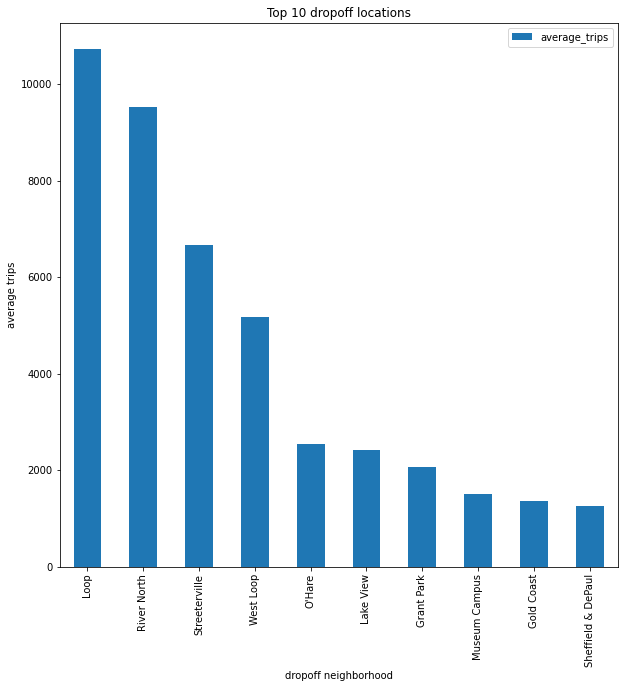

In [13]:
top_location.plot(kind = 'bar', x='dropoff_location_name', y='average_trips', figsize = [10,10], ylabel='average trips', xlabel='dropoff neighborhood', title ='Top 10 dropoff locations')

This graph shows the top 10 Chicago neighborhoods where drop offs occur. The top two spots, the Loop and River North, have about a 10,000 difference in average trips. After River North, the graph subsequently drops and starts to semi-level out with O'hare around 28,000 average rides. The graph continues to decrease by neighborhood but not as drastically.

As a Chicagoan, here are a few additional points of interest which are not surprising. These neighborhoods are predominately on the north side of the city, the region where most tourists tend to visit. Also, these areas in compared to neighborhoods not listed on the graph are very densely populated by people and businesses, which makes parking very frustrating. Finally, night life is very prevalent in all of these areas with the acception of O'hare, which is the airport.

####  taxi companies and number of rides

<AxesSubplot:title={'center':'Number of rides per taxi company'}, ylabel='company name'>

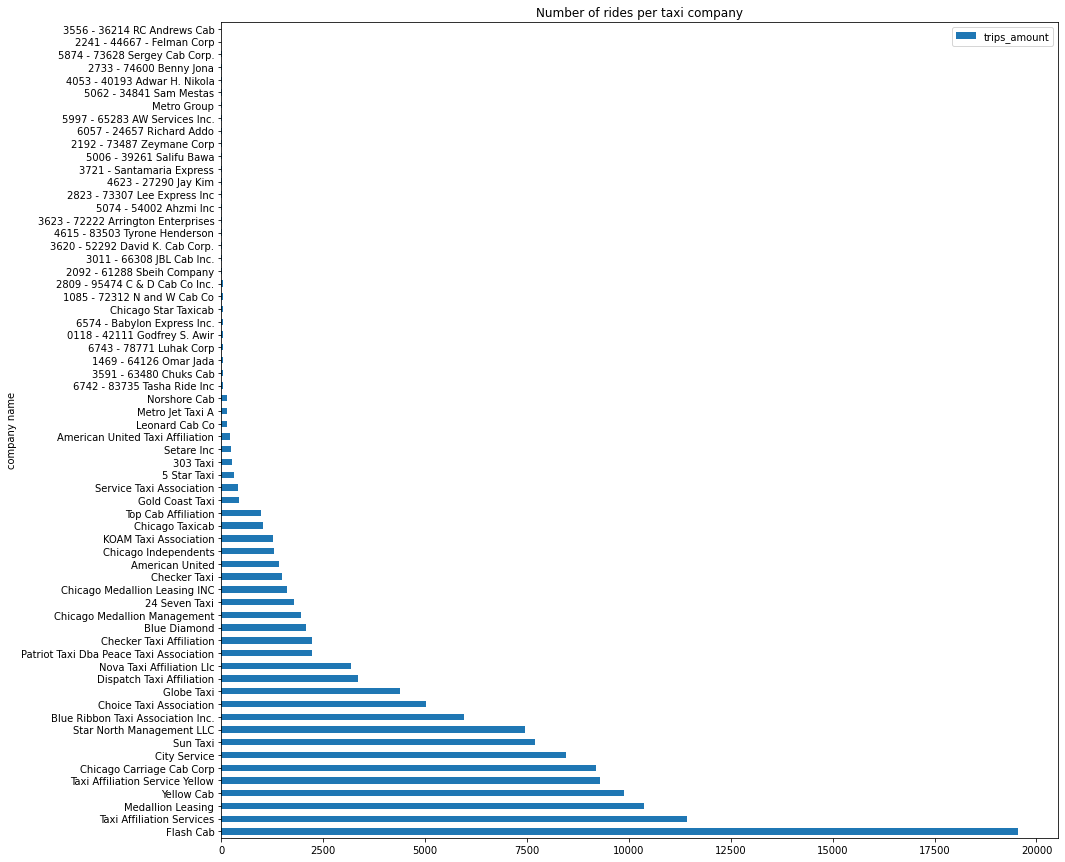

In [25]:
company.plot(kind='barh', x='company_name', y='trips_amount', figsize=[15,15], title='Number of rides per taxi company', ylabel='number of trips', xlabel='company name')

There is a variety of cab companies to choose from, however, only a portion of the 64 are popular. Flash Cab in the top spot with 20,000 trips, has almost double the amount of rides are Taxi Affiliation Services in second place at about 11,500 trips. The companies with the 2nd highest to 9th trips amount (11,500 vs 7,500 from 9th highest) do not even vary as greatly as Flash Cab and Taxi Affiliation Services, proving Flash Cab's domination of the market. After 5 Star Taxi, the trips are almost at 0 and after Northshore Cab, the bars are barely visible.

To conclude, Flash Cab dominates the taxi market with over 20,000 rides. It has a disproportionately high ride rate in comparison to all other companies despite the variety of choices for customers to choose from.

### Testing hypotheses

#### Test the hypothesis: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays." 



This hypothesis will be comparing trips from the Loop to O'Hare on rainy (weather_conditions = 'Bad') Saturdays to other in the dataset where the weather was good.

In [15]:
test_data['start_ts_dow'] = test_data.start_ts.dt.dayofweek
test_data.head()

,start_ts,weather_conditions,duration_seconds,start_ts_dow
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5


created a column extracting days of week 

In [17]:
test_data['start_ts_dow'].unique()

array([5])

When checking unique values, it appears all days in the dataset are 5 where 5 = Saturday, so I do not need to filter for dow

In [20]:
test_data['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

There are 2 unique values in 'weather_conidtions' column. Bad=rainy, Good= not rainy, so I will be filtering the dataset to create 2 new datasets based on weather conditions.

In [18]:
rainy_saturdays = test_data[test_data['weather_conditions'] == 'Bad']
rainy_saturdays.head()

,start_ts,weather_conditions,duration_seconds,start_ts_dow
6,2017-11-04 16:00:00,Bad,2969.0,5
30,2017-11-18 12:00:00,Bad,1980.0,5
34,2017-11-04 17:00:00,Bad,2460.0,5
51,2017-11-04 16:00:00,Bad,2760.0,5
52,2017-11-18 12:00:00,Bad,2460.0,5


filtered dataset for Bad weather

In [19]:
good_saturdays = test_data[test_data['weather_conditions'] == 'Good']
good_saturdays.head()

,start_ts,weather_conditions,duration_seconds,start_ts_dow
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5


filtered dataset for Good weather

**HO:** "Rain does not affect the duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays"

**HA:** "Rain does affect the duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays"

In [23]:
results = st.ttest_ind(rainy_saturdays['duration_seconds'], good_saturdays['duration_seconds'])
alpha = .05 
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject HO')
else:
    print('Cannot reject H0')

p-value: 6.517970327099473e-12
Reject HO


Set alpha to .05 since it is a standard threshold.

T Test results reject the hypothesis that "Rain does not affect the duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays". Although the hypothesis was rejected, it does not mean we can prove the alternative hypothesis that "Rain does affect the duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays", only that we have to reject our original hypothesis.

### Conclusion:

My analysis of current taxi companies in Chicago provides several findings.

First, the top 10 neighborhoods where clients take taxis to include the Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield & DePaul with the Loop and River North both having very high averages.

Secondly, though many options for taxi services exist (64 in our dataset), there are only about 14 that are used frequently (>2500 trips). I suggest looking at the marketing strategy for Flash Cab as they are by far the most popular taxi service currently in Chicago.

Lastly, the hypothesis "Rain does not affect the duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays" was rejected. This may suggest, but does not prove, that weather may affect the duration of rides.

